In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

Hierarchical (agglomerative or bottom-up) clustering starts with every data point being its own cluster, represented as leaf nodes in the dendogram. Data points that are closer to one another form a cluster. Clusters can then fuse together based on different types of *linkage*:

* **Complete linkage** finds two data points that are the farthest apart across each of the two clusters
* **Single linkage** finds two data points that are the closest across each of the two clusters
* **Average linkage** calculates all pairwise distances between data points in cluster 1 and cluster 2, and takes their average
* **Centroid linkage** calculates the centroids of the two clusters

Complete and average linkage are most preferred. Centroid linkage can display undesired "inversion", whereby two clusters are fused at a height below either of the individual clusters in the dendrogram.

Since hierarchical clustering calculates distances, it is not scale invariant. **The data must be scaled to mean 0 and standard deviation 1**. The advantage of dendograms is that it helps visually decide how many clusters the data may have. The taller the branches in dendograms, the more dissimilar the clusters are from its neighboring clusters. The disadvantage is that hierarchical clustering is not resistant to outliers.

In [2]:
iris = datasets.load_iris()  # import Iris data

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["target"] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.shape

(150, 5)

In [4]:
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

In [5]:
data.iloc[:, 2:4].head()  

,petal length (cm),petal width (cm)
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


Let's cluster iris types by petal length and width:

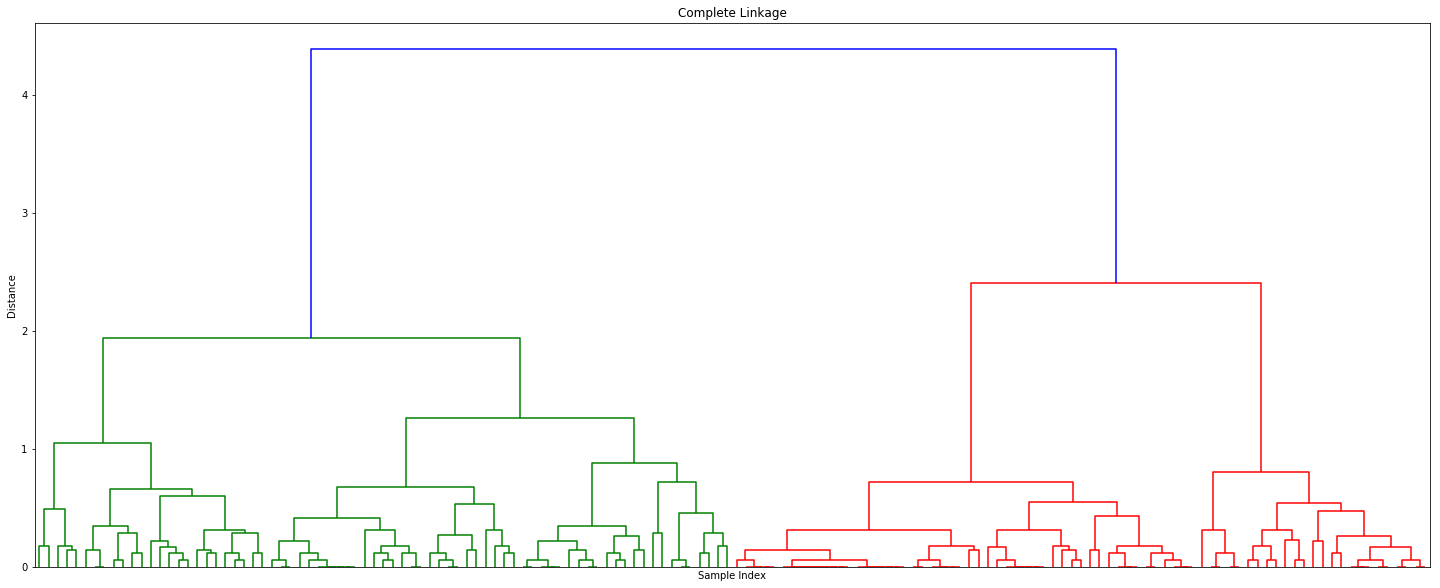

In [6]:
complete_linkage = hierarchy.linkage(data.iloc[:, 2:4], method='complete', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Complete Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
hierarchy.dendrogram(complete_linkage, no_labels=True)
plt.show()

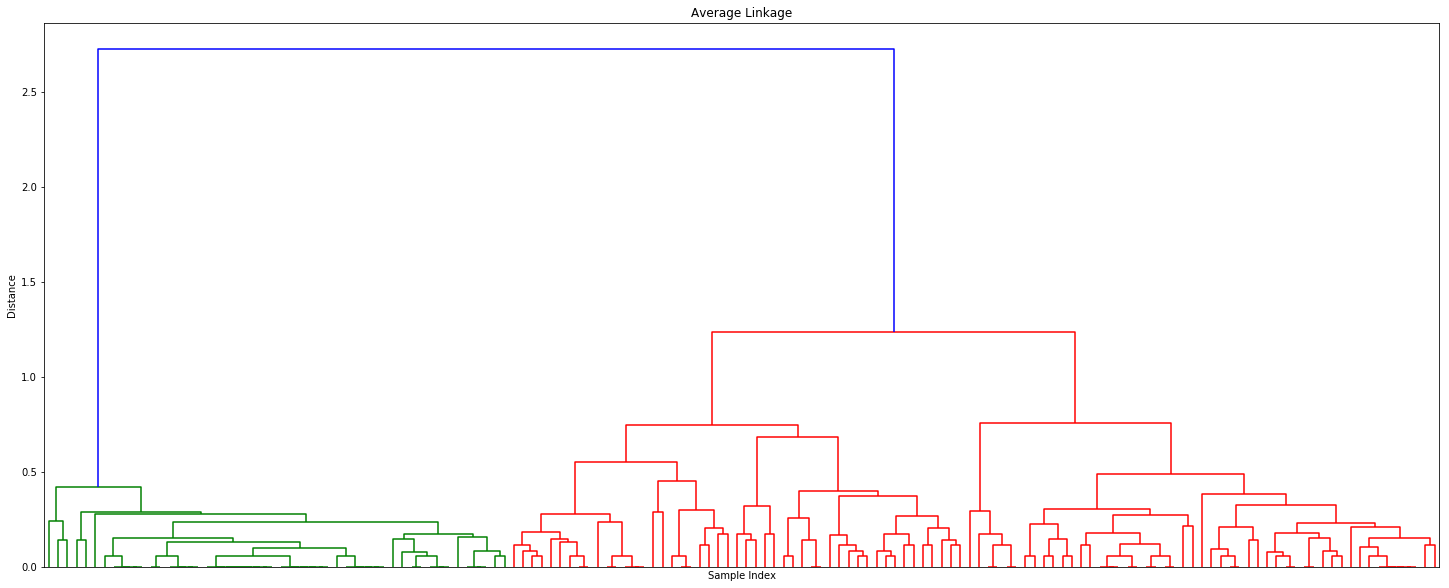

In [7]:
average_linkage = hierarchy.linkage(data.iloc[:, 2:4], method='average', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Average Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
hierarchy.dendrogram(average_linkage, no_labels=True)
plt.show()

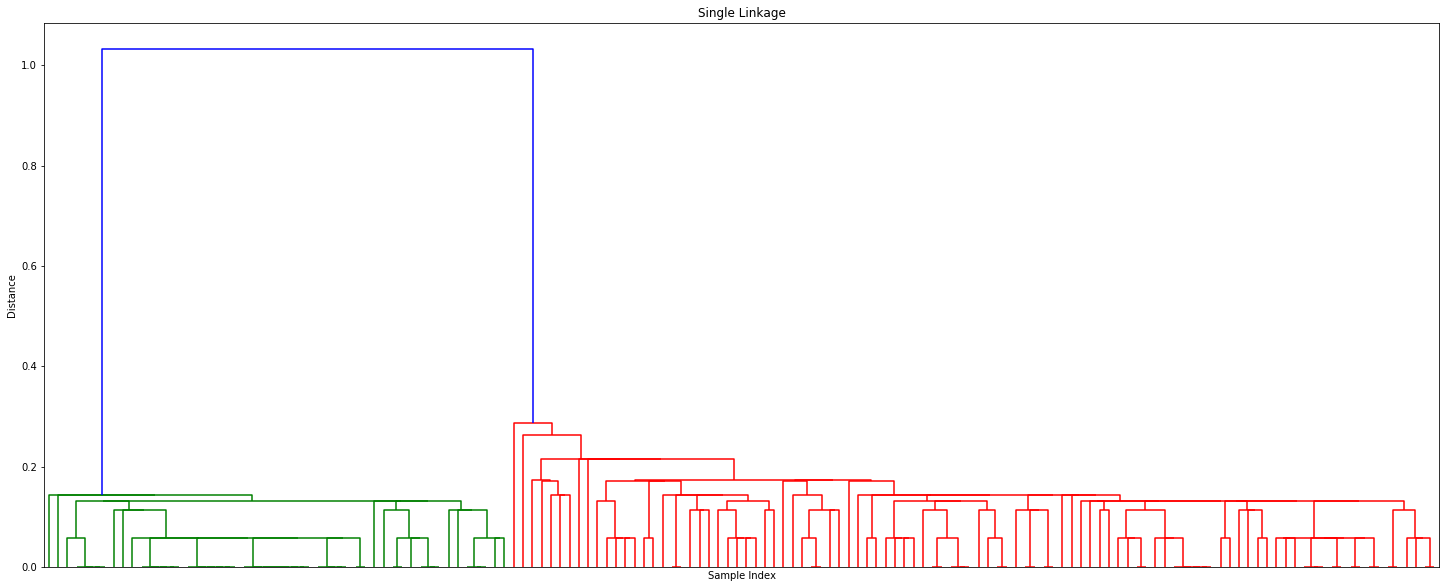

In [8]:
single_linkage = hierarchy.linkage(data.iloc[:, 2:4], method='single', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Single Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
hierarchy.dendrogram(single_linkage, no_labels=True)
plt.show()

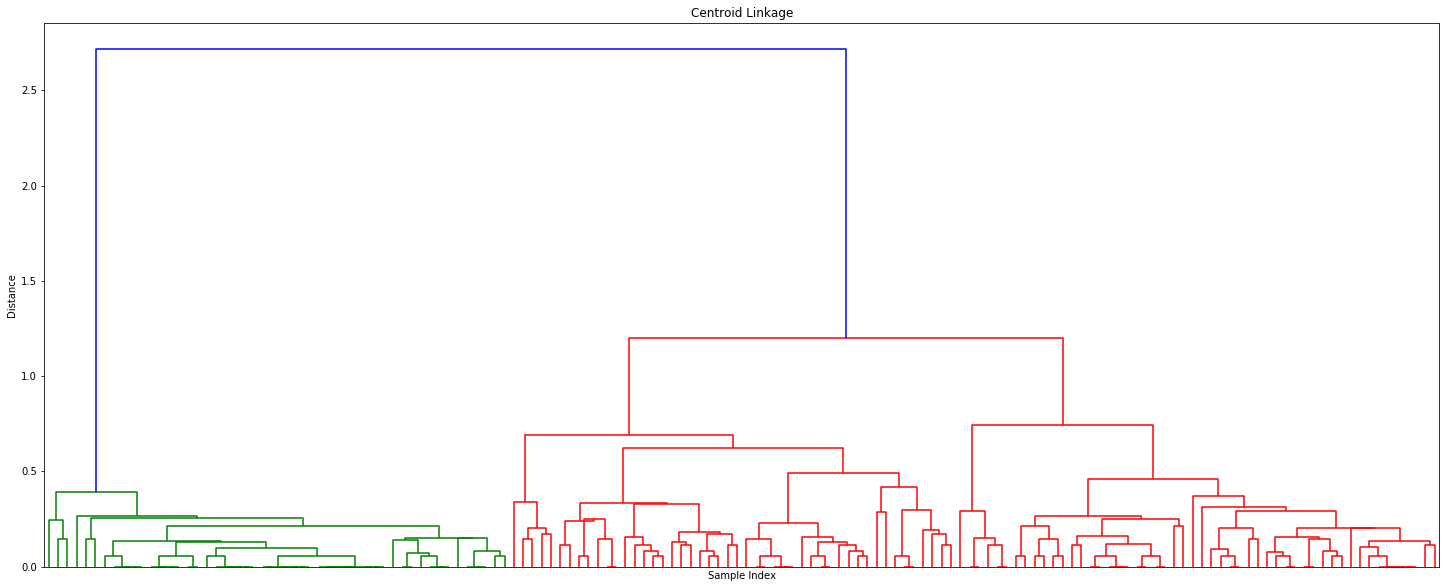

In [9]:
centroid_linkage = hierarchy.linkage(data.iloc[:, 2:4], method='centroid', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Centroid Linkage')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
hierarchy.dendrogram(centroid_linkage, no_labels=True)
plt.show()

In [10]:
# sns.clustermap(data.iloc[:, 2:4], method='centroid', metric='euclidean');

The dendograms suggest that the data may have 2 clusters. Let's use AgglomerativeClustering() with n_clusters=2 to find cluster labels and visually compare those labels with the actual labels.

In [11]:
model2 = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="complete")
model2.fit(data.iloc[:, 2:4])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2, pooling_func=<function mean at 0x107a52488>)

In [12]:
model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

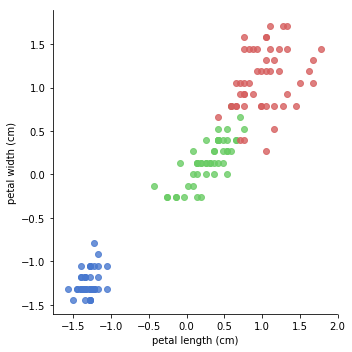

In [13]:
# Visualize original Iris type by petal length/width
sns.lmplot(x="petal length (cm)", 
           y="petal width (cm)", 
           hue="target", 
           data=data, 
           fit_reg=False,
           legend=False,
           palette=sns.color_palette("muted"));

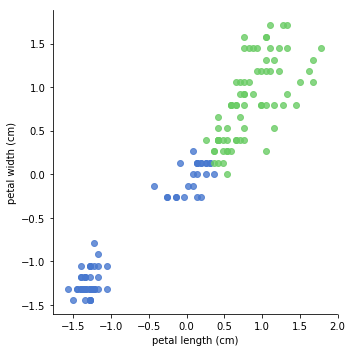

In [14]:
data["pred2"] = model2.labels_
sns.lmplot(x="petal length (cm)", 
           y="petal width (cm)", 
           hue="pred2", 
           data=data, 
           fit_reg=False,
           legend=False,
           palette=sns.color_palette("muted"));

Since the original data has three clusters, let's run AgglomerativeClustering() with n_clusters=2,3,4 and compare their silhouette_score to measure how clearly the clusters are separated. The best $K$ (number of data clusters) is the one with a silhouette score as close as possible to 1.

In [15]:
for k in range(2,5):
    model = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="complete")
    model.fit(data.iloc[:, 2:4])
    print "K = {}, score = {}".format(k, silhouette_score(data.iloc[:, 2:4], model.labels_))

K = 2, score = 0.572698081177
K = 3, score = 0.572698081177
K = 4, score = 0.572698081177


Hierarchical clustering performed worst than K-Means clustering for this data because the original data had three clusters and the silhouette scores and dendograms above suggest that there are two clusters.